In [829]:
%run Algorithms.ipynb


In [830]:
import itertools
import matplotlib.pyplot as plt

def grid_search_ga(G, param_grid):
    best_solution = None
    best_cost = float('inf')
    best_time = float('inf')
    best_params = None
    
    all_results = []

    for params in itertools.product(*param_grid.values()):
        param_dict = dict(zip(param_grid.keys(), params))
        print(f"Evaluating with parameters: {param_dict}")
        
        # Ensure the parameters match the expected ones for genetic_algorithm
        param_dict['elitism_size_ratio'] = param_dict.pop('elitism_size_ratio', 0.05)
        
        # Evaluate the genetic algorithm with current parameters
        ga_cost, ga_time = evaluate_algorithm(genetic_algorithm, G, **param_dict)
        
        all_results.append((ga_cost, ga_time, param_dict))

        # Update the best results if the current solution is better
        if ga_cost < best_cost or (ga_cost == best_cost and ga_time < best_time):
            best_solution = ga_cost
            best_cost = ga_cost
            best_time = ga_time
            best_params = param_dict

    # Plot results
    costs, times, _ = zip(*all_results)
    plt.scatter(times, costs, c='blue', label='Solutions')
    plt.scatter(best_time, best_cost, c='red', label='Best Solution', marker='x')

    plt.xlabel('Execution Time (seconds)')
    plt.ylabel('Best Solution Cost (Number of Vertices)')
    plt.title('Grid Search for Genetic Algorithm')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Best Parameters: {best_params}")
    print(f"Best Cost: {best_cost}")
    print(f"Best Time: {best_time:.4f} seconds")
    
    return best_params, best_cost, best_time



In [831]:
def evaluate_algorithm(algorithm, G, *args, **kwargs):
    start_time = time.time()
    best_solution, best_cost, cost_progress = algorithm(G, *args, **kwargs)
    end_time = time.time()
    execution_time = end_time - start_time

    print("Graph:", G)
    print(f"Minimum Vertex Cover found ({algorithm.__name__}):", best_solution)
    print("Number of Vertices in Cover:", best_cost)
    print(f"Execution Time: {execution_time:.4f} seconds")

    fig, axes = plt.subplots(1, 2, figsize=(6, 2))

    pos = nx.spring_layout(G)
    node_colors = ['red' if best_solution[node] else 'skyblue' for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=60, font_size=6, 
            edge_color='gray', font_color='black', ax=axes[0])
    axes[0].set_title("Random Graph with Vertex Cover", size=15)

    axes[1].plot(cost_progress, label="Cost of Best Solution", color='blue')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Best Cost (Number of Vertices)')
    axes[1].set_title(f'{algorithm.__name__} Progress', size=15)
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()
    
    return best_cost, execution_time

def evaluate_brute_force_algorithm(G):
    start_time = time.time()
    vertex_cover, best_cost = brute_force(G)
    end_time = time.time()
    brute_force_time = end_time - start_time

    print("Graph:", G)
    print("Minimum Vertex Cover found:", vertex_cover, best_cost)
    print(f"Brute Force Execution Time: {brute_force_time:.4f} seconds")

    plt.figure(figsize=(3, 2))
    node_colors = ['skyblue' if node not in vertex_cover else 'red' for node in G.nodes()]
    nx.draw(G, with_labels=True, node_color=node_colors, node_size=60, font_size=10, edge_color='gray', font_color='black')
    plt.title("Random Graph with 8 Nodes", size=20)
    plt.show()
    
    return best_cost, brute_force_time

def evaluate(G):
    brute_cost, brute_time = evaluate_brute_force_algorithm(G)
    #----------------------------------------------------
    max_iter = 10000
    k=0.5
    sim_cost, sim_time = evaluate_algorithm(simulated_annealing, G, max_iter,k)
    #----------------------------------------------------
    max_iter_vns = 1000
    k_max = 5
    move_prob = 0.3
    vns_args = (max_iter_vns, k_max, move_prob)
    vns_cost, vns_time = evaluate_algorithm(vns, G, *vns_args)
    #---------------------------------------------------------
    population_size = 200
    generations = 200
    mutation_rate = 0.05
    elitism_size = 0.1 
    cross = "uniform"
    selection = "tournament"
    ga_cost_uniform,ga_time_uniform = evaluate_algorithm(genetic_algorithm, G, population_size, generations, mutation_rate, elitism_size,cross,selection)
    #---------------------------------------------------------
    cross = "single_point"
    ga_cost_single,ga_time_single = evaluate_algorithm(genetic_algorithm, G, population_size, generations, mutation_rate, elitism_size,cross,selection)
    #---------------------------------------------------------
    selection = "roulette_wheel"
    cross = "uniform"
    ga_cost_uniform_roulette,ga_time_uniform_roulette = evaluate_algorithm(genetic_algorithm, G, population_size, generations, mutation_rate, elitism_size,cross,selection)
    #---------------------------------------------------------
    cross = "single_point"
    ga_cost_single_roulette,ga_time_single_roulette = evaluate_algorithm(genetic_algorithm, G, population_size, generations, mutation_rate, elitism_size,cross,selection)

    print("GA SINGLE_POINT tournament Vertex Cover found:", ga_cost_single, ga_time_single)
    print("GA UNIFORM tournament Vertex Cover tournament found:", ga_cost_uniform, ga_time_uniform)
    
    print("GA SINGLE_POINT roulette Vertex Cover found:", ga_cost_uniform_roulette, ga_time_uniform_roulette)
    print("GA UNIFORM roulette Vertex Cover found:", ga_cost_single_roulette, ga_time_single_roulette)
    
    print("BRUTE Vertex Cover found:", brute_cost, brute_time)
    print("SIM Vertex Cover found:", sim_cost, sim_time)
    print("VNS Vertex Cover found:", vns_cost, vns_time)

Graph: Graph with 20 nodes and 81 edges
Minimum Vertex Cover found: {0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 14, 15, 16, 17, 18} 15
Brute Force Execution Time: 1.7714 seconds


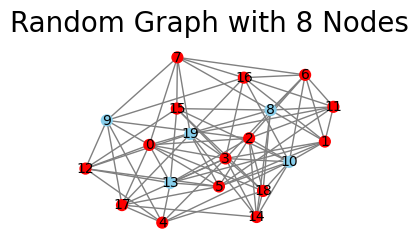

Graph: Graph with 20 nodes and 81 edges
Minimum Vertex Cover found (simulated_annealing): [True, False, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True]
Number of Vertices in Cover: 15
Execution Time: 0.5313 seconds


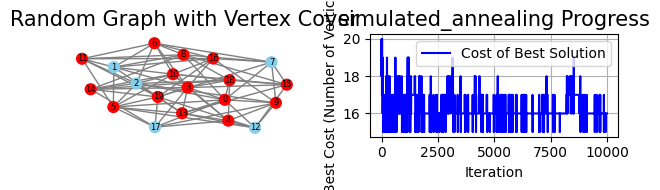

Graph: Graph with 20 nodes and 81 edges
Minimum Vertex Cover found (vns): [False, False, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True]
Number of Vertices in Cover: 15
Execution Time: 0.5438 seconds


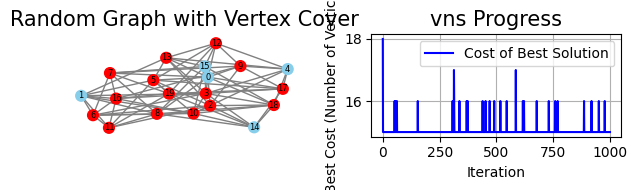

Graph: Graph with 20 nodes and 81 edges
Minimum Vertex Cover found (genetic_algorithm): [True, True, True, True, True, False, False, True, True, False, True, True, True, True, False, False, True, True, True, True]
Number of Vertices in Cover: 15
Execution Time: 0.2227 seconds


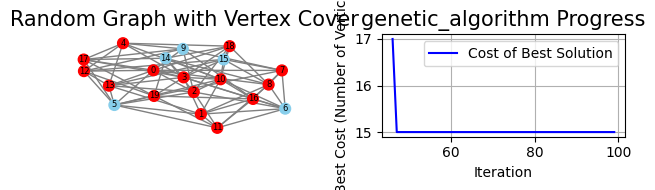

Graph: Graph with 20 nodes and 81 edges
Minimum Vertex Cover found (genetic_algorithm): [True, True, True, True, True, True, True, False, True, True, False, False, False, True, True, True, True, False, True, True]
Number of Vertices in Cover: 15
Execution Time: 0.2572 seconds


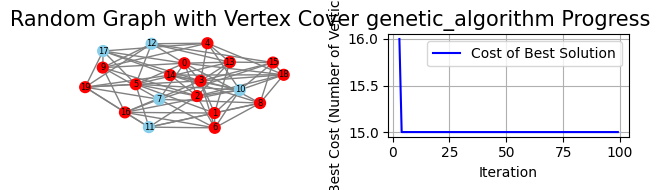

Graph: Graph with 20 nodes and 81 edges
Minimum Vertex Cover found (genetic_algorithm): [False, True, True, True, False, True, False, True, True, True, True, True, True, True, True, False, True, True, True, False]
Number of Vertices in Cover: 15
Execution Time: 0.6303 seconds


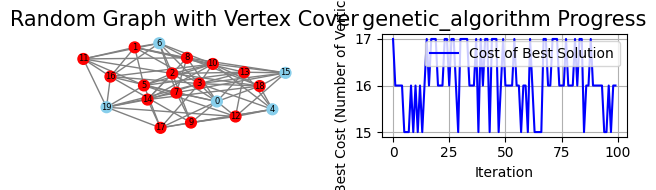

Graph: Graph with 20 nodes and 81 edges
Minimum Vertex Cover found (genetic_algorithm): [True, False, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True]
Number of Vertices in Cover: 15
Execution Time: 0.4001 seconds


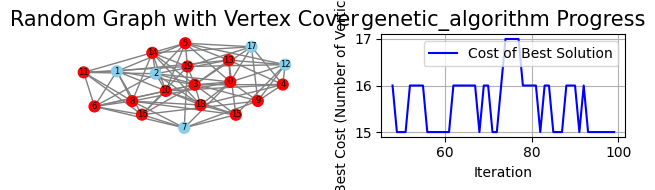

GA SINGLE_POINT tournament Vertex Cover found: 15 0.25715160369873047
GA UNIFORM tournament Vertex Cover tournament found: 15 0.22271227836608887
GA SINGLE_POINT roulette Vertex Cover found: 15 0.6303210258483887
GA UNIFORM roulette Vertex Cover found: 15 0.4000580310821533
BRUTE Vertex Cover found: 15 1.7714011669158936
SIM Vertex Cover found: 15 0.5312974452972412
VNS Vertex Cover found: 15 0.5437848567962646


In [832]:
import networkx as nx
import matplotlib.pyplot as plt
import time

G = nx.erdos_renyi_graph(20, 0.5)
evaluate(G)


In [833]:
#G = nx.erdos_renyi_graph(16, 0.5)
# Define your grid of parameters
#param_grid = {
#    'population_size': [100, 200, 400],
 #   'generations': [50, 100],
  #  'mutation_rate': [0.01, 0.05],
   # 'elitism_size_ratio': [0.05, 0.1],
#}

# Perform grid search
#best_cost, best_params = grid_search_ga(G, param_grid)

#print("Best Cost:", best_cost)
#print("Best Parameters:", best_params)